<a href="https://www.kaggle.com/code/ayodejiyekeen/house-price-prediction-pytorch?scriptVersionId=91072601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Price Prediction -  Advanced Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
path = "../input/house-prices-advanced-regression-techniques/"
train = path + "train.csv"
test = path + "test.csv"
sample_sub = path + "sample_submission.csv"
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)
sample = pd.read_csv(sample_sub)

In [3]:
test_df["SalePrice"] = sample["SalePrice"]
merged_df = test_df.merge(sample, how = "inner", on = ["Id","SalePrice"])
merged_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [4]:
combined_df = pd.concat([train_df, merged_df])
combined_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


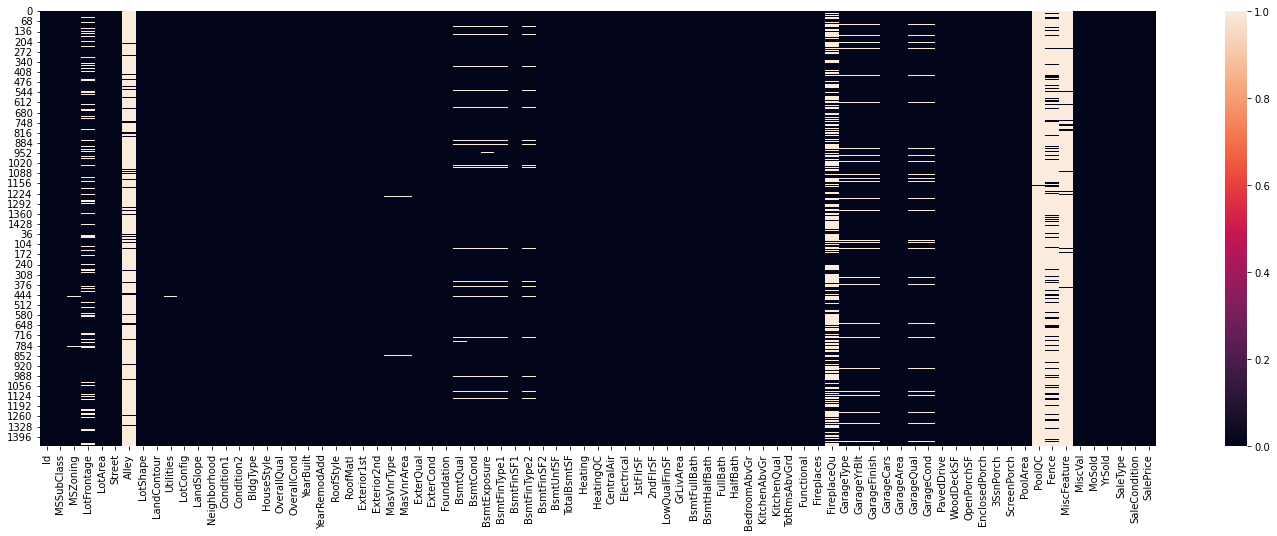

In [5]:
plt.figure(figsize=(25,8))
sns.heatmap(combined_df.isna())
plt.show()

In [6]:
extreme_cols = [k for k,v in dict(zip(combined_df.columns, combined_df.isnull().sum())).items() if v > 1000 ]
extreme_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
# drop columns with more than 1000 missing values
for col in extreme_cols:
    combined_df.drop(col, inplace=True, axis=1)

In [8]:
combined_df.shape

(2919, 76)

In [9]:
missing_cols = [k for k,v in dict(zip(combined_df.columns, combined_df.isnull().sum())).items() if v > 0 ]
len(missing_cols)

29

In [10]:
# categorical columns with missing values
cat_col = [col for col in missing_cols  if combined_df[col].dtype == object]

# numerical columns with missing values
num_col = [col for col in missing_cols  if combined_df[col].dtype != object]

for col in num_col: 
    combined_df[col]  = combined_df[col].fillna(combined_df[col].mean())
    
for col_ in cat_col: 
    combined_df[col_]  = combined_df[col_].fillna(combined_df[col_].mode()[0])

In [11]:
combined_df.isna().any().sum()

0

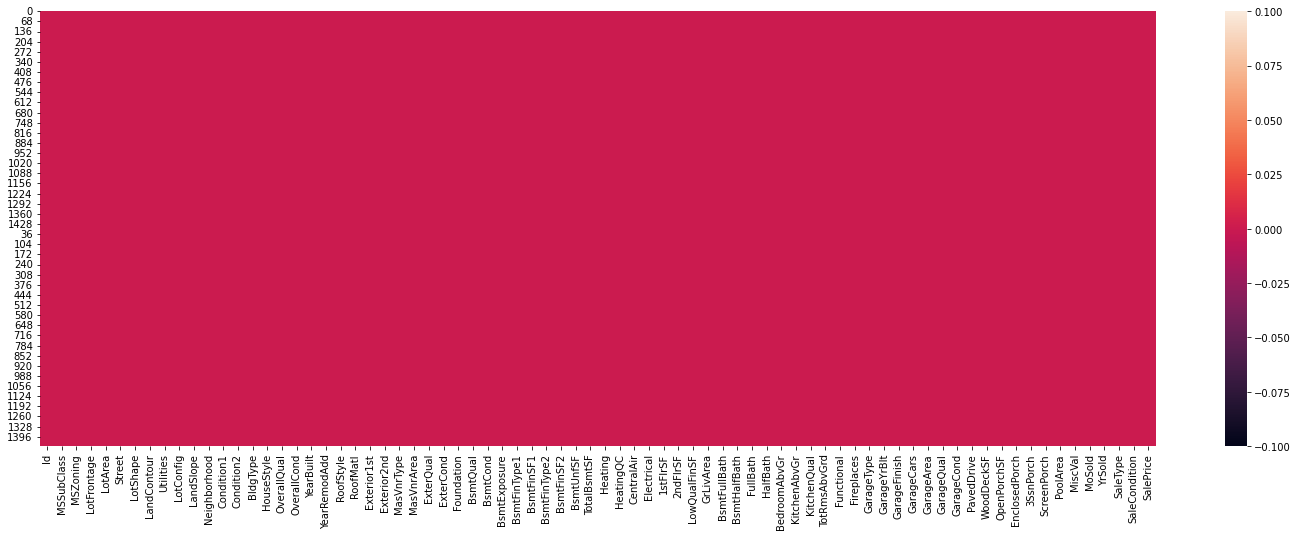

In [12]:
plt.figure(figsize=(25,8))
sns.heatmap(combined_df.isna())
plt.show()

In [13]:
from pandas_profiling import ProfileReport

## Feature Engineering

In [14]:
for i in combined_df.columns:
    print(f'{i} has {combined_df[i].nunique()} unique values.')

Id has 2919 unique values.
MSSubClass has 16 unique values.
MSZoning has 5 unique values.
LotFrontage has 129 unique values.
LotArea has 1951 unique values.
Street has 2 unique values.
LotShape has 4 unique values.
LandContour has 4 unique values.
Utilities has 2 unique values.
LotConfig has 5 unique values.
LandSlope has 3 unique values.
Neighborhood has 25 unique values.
Condition1 has 9 unique values.
Condition2 has 8 unique values.
BldgType has 5 unique values.
HouseStyle has 8 unique values.
OverallQual has 10 unique values.
OverallCond has 9 unique values.
YearBuilt has 118 unique values.
YearRemodAdd has 61 unique values.
RoofStyle has 6 unique values.
RoofMatl has 8 unique values.
Exterior1st has 15 unique values.
Exterior2nd has 16 unique values.
MasVnrType has 4 unique values.
MasVnrArea has 445 unique values.
ExterQual has 4 unique values.
ExterCond has 5 unique values.
Foundation has 6 unique values.
BsmtQual has 4 unique values.
BsmtCond has 4 unique values.
BsmtExposure h

In [15]:
import datetime
year = datetime.datetime.now().year
year

2022

In [16]:
combined_df['TotalYears'] = year - combined_df['YearBuilt']
combined_df.drop('YearBuilt', axis=1, inplace=True)

Treating all columns with less than 17 unique values as categorical features.

In [17]:
cat_features = [col for col in combined_df if (combined_df[col].nunique() < 26)]
len(cat_features)

53

In [18]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    combined_df[feature] = lbl_encoders[feature].fit_transform(combined_df[feature])

In [19]:
combined_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalYears
0,1,5,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,1,2,8,4,208500.0,19
1,2,0,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,4,1,8,4,181500.0,46
2,3,5,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,8,2,8,4,223500.0,21
3,4,6,3,60.0,9550,1,0,3,0,0,...,0,0,0,0,1,0,8,0,140000.0,107
4,5,5,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,11,2,8,4,250000.0,22


In [20]:
cat_values = np.stack([combined_df[i].values for i in cat_features],axis=1)
    
cat_values.shape

(2919, 53)

In [21]:
## Convert from numpy arrays to tensors
import torch
cat_values = torch.tensor(cat_values, dtype=torch.int64)
cat_values

tensor([[5, 3, 1,  ..., 2, 8, 4],
        [0, 3, 1,  ..., 1, 8, 4],
        [5, 3, 1,  ..., 2, 8, 4],
        ...,
        [0, 3, 1,  ..., 0, 8, 0],
        [9, 3, 1,  ..., 0, 8, 4],
        [5, 3, 1,  ..., 0, 8, 4]])

In [22]:
## create a list of all continuous features
cont_features = [col for col in combined_df if (combined_df[col].nunique() > 26) & ( col != 'SalePrice') & (col != 'Id')]
len(cont_features)

21

In [23]:
for col in cont_features:
    print(col , combined_df[col].dtype, combined_df[col].nunique())

LotFrontage float64 129
LotArea int64 1951
YearRemodAdd int64 61
MasVnrArea float64 445
BsmtFinSF1 float64 992
BsmtFinSF2 float64 273
BsmtUnfSF float64 1136
TotalBsmtSF float64 1059
1stFlrSF int64 1083
2ndFlrSF int64 635
LowQualFinSF int64 36
GrLivArea int64 1292
GarageYrBlt float64 104
GarageArea float64 604
WoodDeckSF int64 379
OpenPorchSF int64 252
EnclosedPorch int64 183
3SsnPorch int64 31
ScreenPorch int64 121
MiscVal int64 38
TotalYears int64 118


In [24]:
## Stacking the continous features and the converting to a tensor
cont_values = np.stack([combined_df[i].values for i in cont_features], axis=1)
cont_values = torch.tensor(cont_values, dtype=torch.float)
cont_values

tensor([[6.5000e+01, 8.4500e+03, 2.0030e+03,  ..., 0.0000e+00, 0.0000e+00,
         1.9000e+01],
        [8.0000e+01, 9.6000e+03, 1.9760e+03,  ..., 0.0000e+00, 0.0000e+00,
         4.6000e+01],
        [6.8000e+01, 1.1250e+04, 2.0020e+03,  ..., 0.0000e+00, 0.0000e+00,
         2.1000e+01],
        ...,
        [1.6000e+02, 2.0000e+04, 1.9960e+03,  ..., 0.0000e+00, 0.0000e+00,
         6.2000e+01],
        [6.2000e+01, 1.0441e+04, 1.9920e+03,  ..., 0.0000e+00, 7.0000e+02,
         3.0000e+01],
        [7.4000e+01, 9.6270e+03, 1.9940e+03,  ..., 0.0000e+00, 0.0000e+00,
         2.9000e+01]])

In [25]:
# Label
y = torch.tensor(combined_df['SalePrice'].values, dtype=torch.float).view(-1,1)
y

tensor([[208500.0000],
        [181500.0000],
        [223500.0000],
        ...,
        [219222.4219],
        [184924.2812],
        [187741.8594]])

In [26]:
cat_values.shape, cont_values.shape, y.shape

(torch.Size([2919, 53]), torch.Size([2919, 21]), torch.Size([2919, 1]))

### Embedding

#### Embedding size for categorical columns

In [27]:
cat_dims = [combined_df[col].nunique() for col in cat_features]
embedding_dim = [(x, min(50, (x+1) // 2)) for x in cat_dims]

In [28]:
import torch.nn as nn
import torch.nn.functional as F

In [29]:
embedding_repr = nn.ModuleList([nn.Embedding(inp, out) for inp, out in embedding_dim])

In [30]:
embedding_val = []
for i, e in enumerate(embedding_repr):
    embedding_val.append(e(cat_values[:,i]))

In [31]:
z = torch.cat(embedding_val,  1)
z 

tensor([[-0.6809, -2.4542, -0.1002,  ..., -1.4089, -0.2437, -0.7716],
        [ 0.9252,  0.4740, -0.8439,  ..., -1.4089, -0.2437, -0.7716],
        [-0.6809, -2.4542, -0.1002,  ..., -1.4089, -0.2437, -0.7716],
        ...,
        [ 0.9252,  0.4740, -0.8439,  ..., -0.3589, -0.9206,  0.0876],
        [ 0.0719, -1.1137, -0.9002,  ..., -1.4089, -0.2437, -0.7716],
        [-0.6809, -2.4542, -0.1002,  ..., -1.4089, -0.2437, -0.7716]],
       grad_fn=<CatBackward>)

In [32]:
## Implementing dropout
dropout = nn.Dropout(.4)

In [33]:
final_embedded = dropout(z)
final_embedded

tensor([[-1.1348, -0.0000, -0.1670,  ..., -0.0000, -0.4062, -0.0000],
        [ 0.0000,  0.7900, -1.4065,  ..., -2.3482, -0.4062, -0.0000],
        [-0.0000, -4.0903, -0.1670,  ..., -2.3482, -0.4062, -0.0000],
        ...,
        [ 0.0000,  0.7900, -1.4065,  ..., -0.5982, -1.5343,  0.0000],
        [ 0.1199, -1.8562, -1.5003,  ..., -2.3482, -0.0000, -1.2860],
        [-1.1348, -0.0000, -0.0000,  ..., -0.0000, -0.4062, -1.2860]],
       grad_fn=<MulBackward0>)

In [34]:
## Create a feed forward neural network

class FeedForwardNN(nn.Module):
    
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp, out) for inp, out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp, out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))  
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))  
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))
        
        self.layers = nn.Sequential(*layerlist)
        
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [35]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim, len(cont_features), 1, [100,50], p=0.4)

In [36]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(16, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
    (4): Embedding(4, 2)
    (5): Embedding(2, 1)
    (6): Embedding(5, 3)
    (7): Embedding(3, 2)
    (8): Embedding(25, 13)
    (9): Embedding(9, 5)
    (10): Embedding(8, 4)
    (11): Embedding(5, 3)
    (12): Embedding(8, 4)
    (13): Embedding(10, 5)
    (14): Embedding(9, 5)
    (15): Embedding(6, 3)
    (16): Embedding(8, 4)
    (17): Embedding(15, 8)
    (18): Embedding(16, 8)
    (19): Embedding(4, 2)
    (20): Embedding(4, 2)
    (21): Embedding(5, 3)
    (22): Embedding(6, 3)
    (23): Embedding(4, 2)
    (24): Embedding(4, 2)
    (25): Embedding(4, 2)
    (26): Embedding(6, 3)
    (27): Embedding(6, 3)
    (28): Embedding(6, 3)
    (29): Embedding(5, 3)
    (30): Embedding(2, 1)
    (31): Embedding(5, 3)
    (32): Embedding(5, 3)
    (33): Embedding(4, 2)
    (34): Embedding(5, 3)
    (35): Embedding(3, 2)
    (36): Embedding(8, 4)
   

### Define Loss and Optimizer

In [37]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [38]:
test_categorical = cat_values[1460 : , : ]
train_categorical = cat_values[ : 1460, :]
cat_values.shape, train_categorical.shape , test_categorical.shape

(torch.Size([2919, 53]), torch.Size([1460, 53]), torch.Size([1459, 53]))

In [39]:
test_continuous = cont_values[1460 : , : ]
train_continuous = cont_values[ : 1460, :]
cont_values.shape, train_continuous.shape, test_continuous.shape

(torch.Size([2919, 21]), torch.Size([1460, 21]), torch.Size([1459, 21]))

In [40]:
y_test = y[1460 : , : ]
y_train = y[ : 1460, :]
y.shape, y_train.shape, y_test.shape

(torch.Size([2919, 1]), torch.Size([1460, 1]), torch.Size([1459, 1]))

In [41]:
EPOCHS = 5000
final_losses = []
for i in range(EPOCHS):
    i = i+1
    y_pred = model(train_categorical, train_continuous)
    loss = torch.sqrt(loss_function(y_pred, y_train)) ## RMSE
    final_losses.append(loss)
    if i % 50 == 0:
        print(f'Epoch number: {i} Loss: {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 50 Loss: 197551.171875
Epoch number: 100 Loss: 197446.953125
Epoch number: 150 Loss: 197254.578125
Epoch number: 200 Loss: 196967.734375
Epoch number: 250 Loss: 196607.421875
Epoch number: 300 Loss: 196128.734375
Epoch number: 350 Loss: 195564.609375
Epoch number: 400 Loss: 194945.375
Epoch number: 450 Loss: 194252.890625
Epoch number: 500 Loss: 193439.9375
Epoch number: 550 Loss: 192596.9375
Epoch number: 600 Loss: 191613.1875
Epoch number: 650 Loss: 190602.609375
Epoch number: 700 Loss: 189466.671875
Epoch number: 750 Loss: 188220.828125
Epoch number: 800 Loss: 187199.9375
Epoch number: 850 Loss: 185988.1875
Epoch number: 900 Loss: 184426.296875
Epoch number: 950 Loss: 182955.828125
Epoch number: 1000 Loss: 181443.234375
Epoch number: 1050 Loss: 179822.828125
Epoch number: 1100 Loss: 178443.875
Epoch number: 1150 Loss: 176525.390625
Epoch number: 1200 Loss: 174944.0625
Epoch number: 1250 Loss: 173044.609375
Epoch number: 1300 Loss: 171206.953125
Epoch number: 1350 Loss:

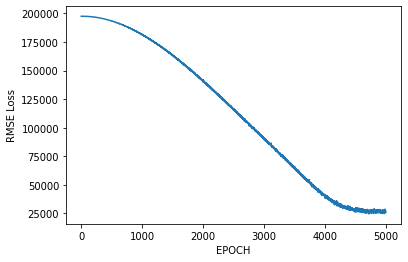

In [42]:
plt.plot(range(EPOCHS), [loss.item() for loss in final_losses])
plt.ylabel('RMSE Loss')
plt.xlabel('EPOCH')
plt.show()

In [43]:
# Validate the test data
y_pred = ''
with torch.no_grad():
    y_pred = model(test_categorical, test_continuous)
    loss = torch.sqrt(loss_function(y_pred, y_test))
print(f'RMSE: {loss}')

RMSE: 75605.6796875


In [44]:
y_pred = model(test_categorical, test_continuous)
y_pred.shape

torch.Size([1459, 1])

In [45]:
sample.shape

(1459, 2)

In [46]:
sample['SalePrice'] = y_pred.detach().numpy()

In [47]:
sample.to_csv('Submission_2.csv', index=False)